In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from PIL import Image
import seaborn as sns
from scipy import linalg
from sklearn.decomposition import TruncatedSVD
from sklearn.utils.extmath import randomized_svd
from numpy import array
from numpy import diag
from numpy import zeros
from scipy.linalg import svd
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
from scipy import stats
from scipy.special import comb

In [2]:
gene_rpkm=pd.read_csv("/Users/markomiholjcic/Documents/GitHub/DataScienceBME6900Project/alan brain atlas data/mouse visual cortex cellular taxonomy/genes_rpkm.csv")
gene_rpkm=gene_rpkm.transpose()
gene_rpkm.shape

(1680, 24057)

In [ ]:
gene_rpkm=pd.read_csv(r"C:\Users\austi\Documents\GitHub\DataScienceBME6900Project\alan brain atlas data\mouse visual cortex cellular taxonomy\genes_rpkm.csv")
gene_rpkm=gene_rpkm.transpose()
gene_rpkm.shape

In [3]:
new_header = gene_rpkm.iloc[0]
gene_rpkm = gene_rpkm[1:]
gene_rpkm.columns = new_header
gene_rpkm

Unnamed: 0,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610008F07Rik,0610009B14Rik,0610009B22Rik,...,mt_DQ540229,mt_DQ719271,mt_DQ719488,mt_DQ725839,mt_EF437370,mt_FR668231,mt_FW313083,mt_GU332589,mt_X57779,mt_X57780
A01101401,0,76.13,0.05,0,0,0,0,0,0,0.09,...,0,0,0,0,0,0,0,1401.76,242.94,242.94
A01101402,0,512.73,10.11,0,0,146.61,0,0,0,0,...,0,0,0,0,0,0,0,1397.16,539.54,539.54
A01101403,0,172.75,0,0,0,23.65,0,0,0,72.72,...,0,0,0,0,0,0,0,332.88,341.45,341.45
A01101404,0,170.56,0.02,0,0,117.6,0,0,0,125.81,...,0,0,0,0,0,0,0,1442.66,260.02,260.02
A01101405,0,113.87,0.04,0,0,180.93,0,0,0,0.1,...,0,0,0,0,0,0,0,749.68,348.1,348.1
A01101406,0,10.9,0.06,0,0,219.01,1.63,0,0,0.1,...,0,0,0,0,0,0,0,729.64,458.86,458.86
A01101407,0,191.23,70.19,0,0.53,134.03,6.35,0,0,200.77,...,0,0,0,0,0,0,0,746.42,336.74,336.74
A01101408,0,67.41,1.82,0,0,118.29,0,0,0,68.43,...,0,0,0,0,0,0,0,799.18,447.15,447.15
A02271433,0,70.56,0,0,0,60.55,0,0,0,0,...,0,0,0,0,0,0,0,1363.71,524.27,524.27
A02271434,0,73.35,20.88,0,0,122.69,46.68,0,0,177.3,...,0,0,0,0,0,0,0,1138.54,723.63,723.63


In [ ]:
cellmeta=pd.read_csv(r"C:\Users\austi\Documents\GitHub\DataScienceBME6900Project\alan brain atlas data\mouse visual cortex cellular taxonomy\cell_metadata.csv")
cellmeta.shape

In [4]:
cellmeta=pd.read_csv("/Users/markomiholjcic/Documents/GitHub/DataScienceBME6900Project/alan brain atlas data/mouse visual cortex cellular taxonomy/cell_metadata.csv")
cellmeta.shape

(1679, 16)

In [5]:
excitatory_meta=cellmeta.loc[cellmeta['major_class']=='Excitatory']
Excitatory_cells=excitatory_meta['long_name']
inhib_meta = cellmeta.loc[cellmeta['major_class']=='Inhibitory']
inhib_cells = inhib_meta['long_name']

In [6]:
inhib_cells.shape

(761,)

In [7]:
excitatory_gene_rpkm=gene_rpkm.loc[Excitatory_cells]
inhib_meta_rpkm = gene_rpkm.loc[inhib_cells]

df = pd.DataFrame()

df = df.append(excitatory_gene_rpkm)
df = df.append(inhib_meta_rpkm)

df


Unnamed: 0,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610008F07Rik,0610009B14Rik,0610009B22Rik,...,mt_DQ540229,mt_DQ719271,mt_DQ719488,mt_DQ725839,mt_EF437370,mt_FR668231,mt_FW313083,mt_GU332589,mt_X57779,mt_X57780
A01101403,0,172.75,0,0,0,23.65,0,0,0,72.72,...,0,0,0,0,0,0,0,332.88,341.45,341.45
A01101406,0,10.9,0.06,0,0,219.01,1.63,0,0,0.1,...,0,0,0,0,0,0,0,729.64,458.86,458.86
A01101407,0,191.23,70.19,0,0.53,134.03,6.35,0,0,200.77,...,0,0,0,0,0,0,0,746.42,336.74,336.74
A01101408,0,67.41,1.82,0,0,118.29,0,0,0,68.43,...,0,0,0,0,0,0,0,799.18,447.15,447.15
A02271433,0,70.56,0,0,0,60.55,0,0,0,0,...,0,0,0,0,0,0,0,1363.71,524.27,524.27
A02271434,0,73.35,20.88,0,0,122.69,46.68,0,0,177.3,...,0,0,0,0,0,0,0,1138.54,723.63,723.63
A02271436,0,6.16,10.12,0,0,156.62,0,0,0,8.76,...,0,0,0,0,0,0,0,886.58,755.7,755.7
A02271438,0,54.48,8.29,0,7.12,150.47,0.29,0,0,137.61,...,0,0,0,0,0,0,0,473.58,291.19,291.19
A12101407,0,0,80.74,0,0,0.51,0,0,0,0,...,0,0,0,0,0,0,0,455.33,356.9,356.9
A12101411,0,0,108.55,0,0,0,0,0,0,177.42,...,0,0,0,0,0,0,0,1988.22,1020.84,1020.84


In [8]:
excitatory_gene_rpkm = excitatory_gene_rpkm.apply(pd.to_numeric)
inhib_meta_rpkm = inhib_meta_rpkm.apply(pd.to_numeric)

df_numeric = df.apply(pd.to_numeric)

In [9]:
excitatory_gene_rpkm_matrix = excitatory_gene_rpkm.to_numpy()
inhib_meta_rpkm = inhib_meta_rpkm.to_numpy()

df_numpy = df_numeric.to_numpy()

In [10]:
df_numpy.shape

(1517, 24057)

In [ ]:
bR = ('Black', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red')
newcmap = LinearSegmentedColormap.from_list("mycmap", bR)

In [ ]:
img = plt.imshow(df_numpy, cmap=newcmap, 
                 extent=[0,100,0,1], aspect=100)

plt.colorbar(img, cmap=newcmap)

In [ ]:
#SVD
#U, s, VT = svd(excitatory_gene_rpkm_matrix)
U, s, vT = svd(df_numpy)

count = 0 

for i in range(len(s)):
    if s[i] < 0.00001:
        count = count + 1

#rank = xcitatory_gene_rpkm_matrix.shape[1] - count
rank = df_numpy.shape[1] - count
rank

In [ ]:
U.shape

In [ ]:
test = U.dot(np.transpose(U))

identity_matrix = np.identity(len(U[:,1]))

np.allclose(test, identity_matrix, atol=1e-8)

In [ ]:
vT.shape

In [ ]:
test = vT.dot(np.transpose(vT))

identity_matrix = np.identity(len(vT[:,1]))

np.allclose(test, identity_matrix, atol=1e-08)

In [ ]:
#U, s, VT = svd(excitatory_gene_rpkm_matrix)
U, s, vT = svd(df_numpy)

U = U[:, :rank]

sigma = diag(s)

sigma = sigma[:rank, :rank]
VT = vT[:rank, :]

In [ ]:
U.shape

In [ ]:
sigma.shape

In [ ]:
VT.shape

In [ ]:
uDotS = U.dot(sigma)
uDotSDotVt = uDotS.dot(VT)

testSVD = np.round(abs(excitatory_gene_rpkm_matrix - uDotSDotVt))
testSVD = np.matrix(testSVD)
if (testSVD.all() == 0):
    zero = True
zero

In [ ]:
print(np.max(U))
print(np.min(U))
print(np.mean(U))

In [ ]:
gBR = ('Lawngreen', 'Lawngreen', 'Lawngreen', 'Lawngreen', 'Lawngreen',
       'Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen',
       'Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen',
       'Lawngreen','Lawngreen','Lawngreen',
       'Black', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red','Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red')
gBRmap = LinearSegmentedColormap.from_list("mycmap", gBR)

In [ ]:
img = plt.imshow(U, cmap=gBRmap, extent=[0,100,0,1], aspect=100)

plt.title("U")
plt.colorbar(img, cmap=gBRmap)

In [ ]:
gBR2 = ('Lawngreen', 'Lawngreen', 'Lawngreen', 'Lawngreen', 'Lawngreen',
       'Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen',
       'Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen',
       'Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen',
        'Lawngreen','Lawngreen','Lawngreen',
       'Black', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red','Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red','Red')
gBRmap2 = LinearSegmentedColormap.from_list("mycmap", gBR2)

In [ ]:
img = plt.imshow(VT, cmap=gBRmap2, extent=[0,10,0,1], aspect=10)

plt.title('V Transpose')
plt.colorbar(img, cmap=gBRmap2)

In [ ]:
print(np.min(VT))
print(np.max(VT))
print(np.mean(VT))

In [ ]:
rBr = ('Black', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red')
sigmap = LinearSegmentedColormap.from_list("sigmap", rBr)

In [ ]:
plt.figure(figsize=(10,10))
img = plt.imshow(sigma, cmap=sigmap, extent=[0,100,0,1], aspect=100)

plt.title('Sigma')
plt.colorbar(img, cmap=sigmap)

In [ ]:
print(np.min(sigma))
print(np.max(sigma))
print(np.mean(sigma))

In [ ]:
diagonal = diag(sigma)

sort_diag = np.sort(diagonal)
sort_diag=sort_diag[::-1]

np.allclose(sort_diag, diagonal)

In [ ]:
diag(sigma)[0:75]

In [ ]:
d_sig=diag(sigma)

count = 0
for m in range(len(d_sig)):
    if d_sig[m] < 41100:
        count = m
        break
        
sig=d_sig[:count]
denoise_sigma=np.diag(sig)
len(denoise_sigma)

In [ ]:
dns_U=U[:,:len(denoise_sigma)]
dns_VT=VT[:len(denoise_sigma),:]


In [ ]:
dns_uDotS = dns_U.dot(denoise_sigma)
dns_uDotSDotVt = dns_uDotS.dot(dns_VT)


In [ ]:
bR = ('Black', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red')
newcmap = LinearSegmentedColormap.from_list("mycmap", bR)

In [ ]:
img = plt.imshow(dns_uDotSDotVt, cmap=newcmap, 
                 extent=[0,100,0,1], aspect=100)

plt.colorbar(img, cmap=newcmap)

In [ ]:
plt.figure(figsize=(10,10))
img = plt.imshow(denoise_sigma, cmap=sigmap, extent=[0,100,0,1], aspect=100)

plt.title('Sigma')
plt.colorbar(img, cmap=sigmap)

In [ ]:
gBR3 = ('Lawngreen', 'Lawngreen', 'Lawngreen', 'Lawngreen', 'Lawngreen',
       'Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen',
       'Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen',
       'Black', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red','Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red','Red')
gBRmap3 = LinearSegmentedColormap.from_list("mycmap", gBR3)

In [ ]:
img = plt.imshow(dns_VT, cmap=gBRmap3, extent=[0,10,0,1], aspect=10)

plt.title('V Transpose')
plt.colorbar(img, cmap=gBRmap3)

In [ ]:
img = plt.imshow(dns_U, cmap=gBRmap, extent=[0,100,0,1], aspect=100)

plt.title("U")
plt.colorbar(img, cmap=gBRmap)

In [11]:
excitatory_meta=cellmeta.loc[cellmeta['major_class']=='Excitatory']

inhib_meta = cellmeta.loc[cellmeta['major_class']=='Inhibitory']

ex_in_meta = pd.DataFrame()

ex_in_meta = excitatory_meta.append(inhib_meta)

ex_in_meta
ex_index = excitatory_meta.index
ex_length = len(ex_index) - 1
print("Excitatory is from 0-", ex_length, "index")

inhib_index = inhib_meta.index
inhib_length = len(inhib_index)
inhib_max_index = ex_length + inhib_length
print("Inhibitatory is from:", ex_length+1, "-", inhib_max_index)

Excitatory is from 0- 755 index
Inhibitatory is from: 756 - 1516


In [12]:
ex_inhib_rpkm =gene_rpkm.loc[ex_in_meta["long_name"]]

ex_inhib_rpkm = ex_inhib_rpkm.apply(pd.to_numeric)

ex_inhib_rpkm = ex_inhib_rpkm.to_numpy()

#ex_inhib_rpkm = np.transpose(ex_inhib_rpkm)
ex_inhib_rpkm.shape

(1517, 24057)

In [ ]:
bR = ('Black', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red')
newcmap = LinearSegmentedColormap.from_list("mycmap", bR)

In [ ]:
img = plt.imshow(ex_inhib_rpkm, cmap=newcmap, 
                 extent=[0,100,0,1], aspect=100)

plt.colorbar(img, cmap=newcmap)

In [13]:
#SVD
U, s, vT = svd(ex_inhib_rpkm)

count = 0 

for i in range(len(s)):
    if s[i] < 0.00001:
        count = count + 1

rank = ex_inhib_rpkm.shape[1] - count
rank

24057

In [14]:
U, s, VT = svd(ex_inhib_rpkm)

U = U[:, :rank]

sigma = diag(s)

sigma = sigma[:rank, :rank]
VT = VT[:rank, :]

In [ ]:
gBR2 = ('Lawngreen', 'Lawngreen', 'Lawngreen', 'Lawngreen', 'Lawngreen',
       'Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen',
       'Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen',
       'Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen',
       'Black', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red','Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red','Red')
gBRmap2 = LinearSegmentedColormap.from_list("mycmap", gBR2)

In [ ]:
img = plt.imshow(VT, cmap=gBRmap2, extent=[0,10,0,1], aspect=10)

plt.title('V Transpose')
plt.colorbar(img, cmap=gBRmap2)

In [16]:
rBr = ('Black', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red')
sigmap = LinearSegmentedColormap.from_list("sigmap", rBr)

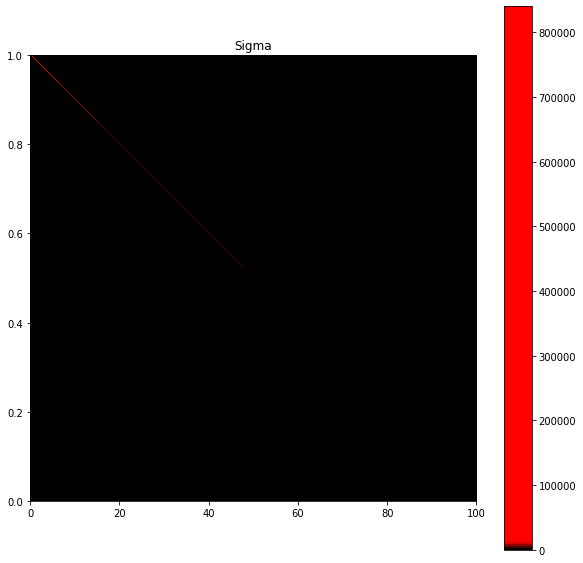

In [17]:
plt.figure(figsize=(10,10))
img = plt.imshow(sigma, cmap=sigmap, extent=[0,100,0,1], aspect=100)

plt.title('Sigma')
plt.colorbar(img, cmap=sigmap)

In [18]:
diag(sigma)[0:30]

array([840481.81529656, 574724.79119554, 208887.70235089, 168672.76217375,
       142648.16240761,  96654.57481659,  86317.89087098,  71810.34447491,
        59065.35802216,  54586.85569727,  50175.00339466,  44646.40666418,
        41663.46377079,  41035.85313976,  39436.89644634,  37168.75488687,
        36216.43053168,  32557.58901369,  31851.79439295,  31066.09135966,
        30003.36897968,  29018.3294261 ,  27154.30317036,  26366.11891417,
        25639.20191476,  25380.30229933,  23952.76829943,  23555.25837681,
        22464.13484282,  22339.86362579])

In [19]:
d_sig=diag(sigma)

count = 0
for m in range(len(d_sig)):
    if d_sig[m] < 41100:
        count = m
        break
        
sig=d_sig[:count]
denoise_sigma=np.diag(sig)
len(denoise_sigma)

13

In [20]:
dns_U=U[:,:len(denoise_sigma)]
dns_VT=VT[:len(denoise_sigma),:]

In [ ]:
dns_uDotS = dns_U.dot(denoise_sigma)
dns_uDotSDotVt = dns_uDotS.dot(dns_VT)

In [ ]:
plt.figure(figsize=(10,10))
img = plt.imshow(denoise_sigma, cmap=sigmap, extent=[0,100,0,1], aspect=100)

plt.title('Sigma')
plt.colorbar(img, cmap=sigmap)

In [ ]:
gBR3 = ('Lawngreen', 'Lawngreen', 'Lawngreen', 'Lawngreen', 'Lawngreen',
       'Lawngreen','Lawngreen', 'Lawngreen','Lawngreen','Lawngreen','Lawngreen',
        'Lawngreen','Lawngreen', 'Lawngreen',
       'Black', 'Red', 'Red','Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
       'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red')
gBRmap3 = LinearSegmentedColormap.from_list("mycmap", gBR3)

In [ ]:
img = plt.imshow(dns_VT, cmap=gBRmap3, extent=[0,10,0,1], aspect=10)

plt.title('V Transpose')
plt.colorbar(img, cmap=gBRmap3)

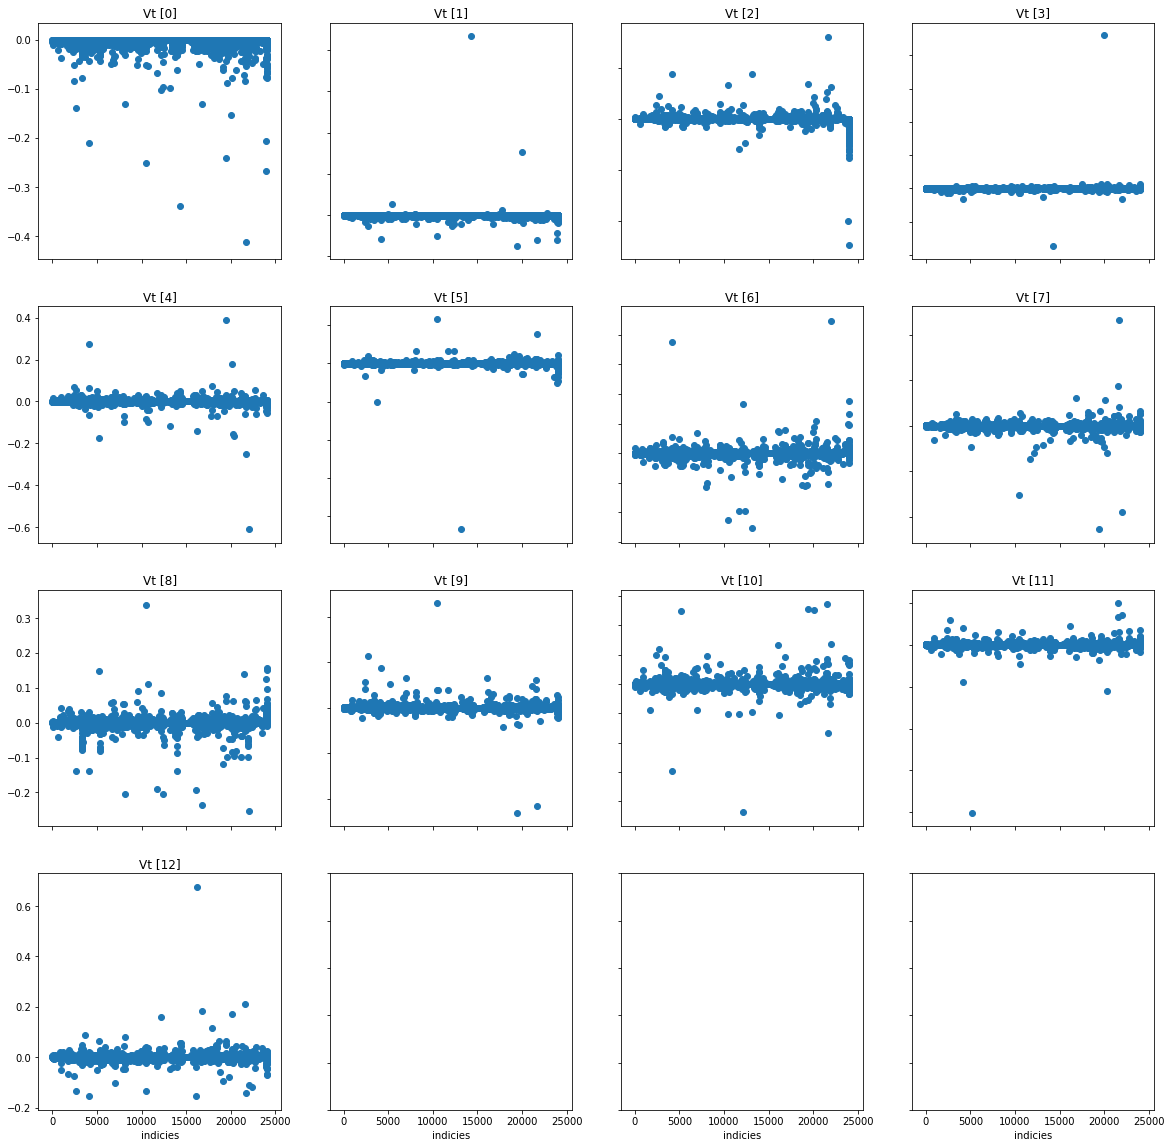

In [21]:
vx = np.arange(0,VT.shape[0],1)

fig, axs = plt.subplots(4, 4, figsize=(20,20), sharex='all')

for i in range(3):
    for k in range(4):
        axs[i, k].scatter(vx, dns_VT[(4*i)+k,:])
        num = str((4*i)+k)
        axs[i, k].set_title('Vt ['+num+']')

axs[3,0].scatter(vx, dns_VT[12,:])
axs[3,0].set_title('Vt [12]')

        #axs[0, 1].plot(x, y, 'tab:orange')
#axs[0, 1].set_title('Axis [0,1]')

#
for ax in axs.flat:
    ax.set(xlabel='indicies')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    

In [ ]:
v4 = dns_VT[4,:]

inhib = v4[0:755]
excit = v4[756:1516]

stats.mannwhitneyu(inhib,excit)

In [ ]:
lists = [inhib,excit]

fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(lists)

ax = ax.set_xticklabels(['Inhibitatory', 'Excitatory'])

In [ ]:
v4 = dns_VT[4,:]

v4[750:770]

In [ ]:
N = len(dns_VT[4,:])
n = len(inhib)
K = 755
k = 755

summation =((comb(K,k)*comb(N-K,n-k))/(comb(N,n)))
    
summation = np.array(summation, dtype=np.longfloat)
summation

In [ ]:
dns_U[:,4]

In [ ]:
U4 = U[:,4]
Ux = np.arange(0,U.shape[0],1)
plt.scatter(Ux,U4)